## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

c:\users\admin\anaconda3\envs\cotton\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\admin\anaconda3\envs\cotton\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\admin\anaconda3\envs\cotton\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\admin\anaconda3\envs\cotton\lib\site-packages\tensorflow\pyth

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'


In [4]:
# Import resnet50 application library 
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




c:\users\admin\anaconda3\envs\cotton\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
______________________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [19]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
61/61 [==============================] - 609s 10s/step - loss: 1.3241 - acc: 0.8616 - val_loss: 3.8980 - val_acc: 0.3333
Epoch 2/5
61/61 [==============================] - 632s 10s/step - loss: 0.7467 - acc: 0.9385 - val_loss: 10.5218 - val_acc: 0.1111
Epoch 3/5
61/61 [==============================] - 610s 10s/step - loss: 0.6886 - acc: 0.9472 - val_loss: 15.4029 - val_acc: 0.2778
Epoch 4/5
61/61 [==============================] - 662s 11s/step - loss: 0.4886 - acc: 0.9590 - val_loss: 12.7072 - val_acc: 0.2778
Epoch 5/5
61/61 [==============================] - 709s 12s/step - loss: 0.4606 - acc: 0.9698 - val_loss: 21.3821 - val_acc: 0.2778


In [21]:
import matplotlib.pyplot as plt

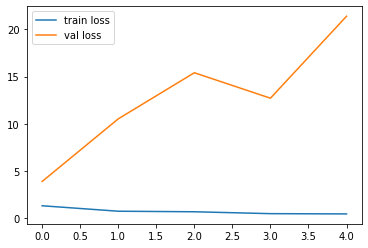

KeyError: 'accuracy'

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [24]:

y_pred = model.predict(test_set)


In [25]:
y_pred

array([[2.7085447e-09, 3.2152149e-19, 8.0883258e-11, 1.0000000e+00],
       [2.4414046e-09, 2.7709909e-19, 2.8021810e-10, 1.0000000e+00],
       [3.2501484e-09, 6.8013675e-19, 2.9195429e-10, 1.0000000e+00],
       [7.8413969e-09, 9.0557245e-20, 5.0339809e-11, 1.0000000e+00],
       [4.9498383e-09, 1.8603756e-20, 1.6990059e-10, 1.0000000e+00],
       [4.1611439e-09, 6.5860534e-19, 4.6859544e-10, 1.0000000e+00],
       [5.6878804e-09, 7.9623796e-19, 2.5246738e-10, 1.0000000e+00],
       [1.1642975e-09, 1.1242036e-19, 9.6745521e-11, 1.0000000e+00],
       [3.7347596e-09, 1.7190449e-19, 2.2300491e-10, 1.0000000e+00],
       [3.1379184e-09, 1.3631701e-18, 3.9168602e-10, 1.0000000e+00],
       [2.9627389e-09, 4.6181266e-19, 2.0650129e-10, 1.0000000e+00],
       [3.4773695e-09, 1.8522190e-19, 1.2193468e-10, 1.0000000e+00],
       [3.1938390e-09, 2.0331387e-20, 8.3072806e-11, 1.0000000e+00],
       [5.0821458e-09, 2.8365083e-19, 1.8984533e-10, 1.0000000e+00],
       [5.9336234e-09, 1.1124040e-

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)